In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
os.chdir(r'E:\DataScience-Assignments\Credit Risk Modelling Using Python')

In [4]:
loan_data_inputs_train=pd.read_csv('loan_data_inputs_train.csv',index_col=0)
loan_data_targets_train=pd.read_csv('loan_data_targets_train.csv',index_col=0)
loan_data_inputs_test=pd.read_csv('loan_data_inputs_test.csv',index_col=0)
loan_data_targets_test=pd.read_csv('loan_data_targets_test.csv',index_col=0)

In [5]:
loan_data_inputs_train.shape

(373028, 324)

In [6]:
loan_data_targets_train.shape

(373028, 1)

In [7]:
loan_data_inputs_test.shape

(93257, 324)

In [8]:
loan_data_targets_test.shape

(93257, 1)

### Selecting the Features

In [9]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [10]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [11]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


# PD Model Estimation

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
reg=LogisticRegression(max_iter=300)

In [14]:
pd.options.display.max_rows=None

In [15]:
reg.fit(inputs_train.values,loan_data_targets_train.values.ravel())

LogisticRegression(max_iter=300)

In [16]:
reg.intercept_

array([-1.90233698])

In [17]:
reg.coef_

array([[ 1.11918542,  0.88185169,  0.68796437,  0.50036964,  0.32540795,
         0.13758537,  0.09136914,  0.10688443,  0.03803278,  0.05988101,
         0.06065965,  0.063155  ,  0.07929284,  0.13685188,  0.10125246,
         0.18562841,  0.24075933,  0.22497782,  0.26378943,  0.32185153,
         0.5224397 ,  0.08837219, -0.01051186,  0.3052377 ,  0.20172911,
         0.21451975,  0.26745811,  0.05403191,  0.07964452,  0.10096585,
         0.12576399,  0.09096211,  0.06084028,  0.12357138,  1.07059092,
         0.8706389 ,  0.76987966,  0.56880307,  0.40726466,  0.16215581,
        -0.07341804,  0.88241404,  0.55519143,  0.30380964,  0.11155873,
         0.05632066,  0.03788221,  0.07904471,  0.11959414,  0.12516945,
         0.09592486,  0.05258672,  0.6847885 ,  0.54093827,  0.33174832,
         0.47191798,  0.37563702,  0.34966157,  0.33298539,  0.33156261,
         0.35987192,  0.27291259,  0.12530397,  0.16470019, -0.01988164,
         0.02707853,  0.20397586,  0.04335951,  0.0

In [18]:
feature_name=inputs_train.columns.values

In [19]:
summary_table=pd.DataFrame(columns=['Feature Name'],data=feature_name)
summary_table['Coefficients']=np.transpose(reg.coef_)
summary_table.index=summary_table.index+1
summary_table.loc[0]=['Intercept',reg.intercept_[0]]
summary_table=summary_table.sort_index()
summary_table

,Feature Name,Coefficients
0,Intercept,-1.902337
1,grade:A,1.119185
2,grade:B,0.881852
3,grade:C,0.687964
4,grade:D,0.500370
5,grade:E,0.325408
6,grade:F,0.137585
7,home_ownership:OWN,0.091369
8,home_ownership:MORTGAGE,0.106884
9,addr_state:NM_VA,0.038033


## Build a Logistic Regression with p-values

In [20]:
from sklearn import linear_model
import scipy.stats as stat
class LogisticRegression_with_p_values:
    def __init__(self,*args,**kwargs):
        self.model=linear_model.LogisticRegression(*args,**kwargs)
    def fit(self,X,y):
        self.model.fit(X,y)
        denom=(2.0+(1.0+np.cosh(self.model.decision_function(X))))
        denom=np.tile(denom,(X.shape[1],1)).T
        F_ij=np.dot((X/denom).T,X)
        Cramer_Rao=np.linalg.inv(F_ij)
        sigma_estimates=np.sqrt(np.diagonal(Cramer_Rao))
        z_scores=self.model.coef_[0]/sigma_estimates
        p_values=[stat.norm.sf(abs(x))*2 for x in z_scores]
        self.coef_=self.model.coef_
        self.intercept_=self.model.intercept_
        self.p_values=p_values

In [21]:
reg=LogisticRegression_with_p_values(max_iter=300)

In [22]:
reg.fit(inputs_train.values,loan_data_targets_train.values.ravel())

In [23]:
summary_table=pd.DataFrame(columns=['Feature Name'],data=feature_name)
summary_table['Coefficients']=np.transpose(reg.coef_)
summary_table.index=summary_table.index+1
summary_table.loc[0]=['Intercept',reg.intercept_[0]]
summary_table=summary_table.sort_index()
summary_table

,Feature Name,Coefficients
0,Intercept,-1.902337
1,grade:A,1.119185
2,grade:B,0.881852
3,grade:C,0.687964
4,grade:D,0.500370
5,grade:E,0.325408
6,grade:F,0.137585
7,home_ownership:OWN,0.091369
8,home_ownership:MORTGAGE,0.106884
9,addr_state:NM_VA,0.038033


In [24]:
p_values=reg.p_values

In [25]:
p_values=np.append(np.nan,np.array(p_values))

In [26]:
len(p_values)

105

In [27]:
summary_table['p_values']=p_values

In [28]:
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,-1.902337,NaN
1,grade:A,1.119185,5.314626e-49
2,grade:B,0.881852,1.743884e-56
3,grade:C,0.687964,1.446374e-39
4,grade:D,0.500370,1.301000e-23
5,grade:E,0.325408,5.560011e-13
6,grade:F,0.137585,3.516475e-03
7,home_ownership:OWN,0.091369,1.080587e-07
8,home_ownership:MORTGAGE,0.106884,5.046744e-23
9,addr_state:NM_VA,0.038033,1.673197e-01


In [29]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [30]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [31]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [32]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values(max_iter=300)
reg2.fit(inputs_train.values, loan_data_targets_train.values.ravel())

In [33]:
feature_name = inputs_train.columns.values

In [34]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.421554
1,grade:A,1.121231
2,grade:B,0.881607
3,grade:C,0.688271
4,grade:D,0.501086
5,grade:E,0.326943
6,grade:F,0.139324
7,home_ownership:OWN,0.093322
8,home_ownership:MORTGAGE,0.106049
9,addr_state:NM_VA,0.038059


In [35]:
p_values=reg2.p_values

In [36]:
len(p_values)

84

In [37]:
p_values=np.append(np.nan,np.array(p_values))

In [38]:
len(p_values)

85

In [39]:
len(summary_table)

85

In [40]:
summary_table['p_values']=p_values

# PD Model Validation(Test)

### Out-of-sample validation(test)

In [41]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [42]:
# And here, in the list below, we keep the variable names for the reference categories,
# only for the variables we used in our final PD model.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [43]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [44]:
y_hat_test = reg2.model.predict(inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [45]:
y_hat_test
# This is an array of predicted discrete classess (in this case, 0s and 1s).

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [46]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [47]:
y_hat_test_proba

array([[0.07583543, 0.92416457],
       [0.15154068, 0.84845932],
       [0.11435191, 0.88564809],
       ...,
       [0.02676818, 0.97323182],
       [0.04023802, 0.95976198],
       [0.04762633, 0.95237367]])

In [48]:
y_hat_test_proba[:][:,1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

array([0.92416457, 0.84845932, 0.88564809, ..., 0.97323182, 0.95976198,
       0.95237367])

In [49]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# We store these probabilities in a variable.

In [50]:
len(y_hat_test_proba)
# This variable contains an array of probabilities of being 1.

93257

In [51]:
loan_data_targets_test.isna().sum()

good_bad    0
dtype: int64

In [52]:
loan_data_targets_test_temp = loan_data_targets_test

In [53]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [54]:
len(loan_data_targets_test_temp)

93257

In [55]:
len(y_hat_test_proba)

93257

In [56]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [57]:
df_actual_predicted_probs.isna().sum()

good_bad    0
0           0
dtype: int64

In [58]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [59]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [60]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924165
288564,1,0.848459
213591,1,0.885648
263083,1,0.940561
165001,1,0.968704


In [61]:
df_actual_predicted_probs.isna().sum()

loan_data_targets_test    0
y_hat_test_proba          0
dtype: int64

In [62]:
tr=0.9
df_actual_predicted_probs['y_hat_test']=np.where(df_actual_predicted_probs['y_hat_test_proba']>tr,1,0)

In [63]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,7375,2815
1,35811,47256


In [64]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
362514,1,0.924165,1
288564,1,0.848459,0
213591,1,0.885648,0
263083,1,0.940561,1
165001,1,0.968704,1


In [65]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079083,0.030185
1,0.384003,0.506729


In [66]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])/ df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.5858112527745907

In [67]:
from sklearn.metrics import roc_curve,roc_auc_score

In [68]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99950932, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.9926684 , 0.9926684 , 0.99073962, ..., 0.48804092, 0.38839206,
        0.36715122]))

In [69]:
fpr,tpr,thresholds=roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'ROC Curve')

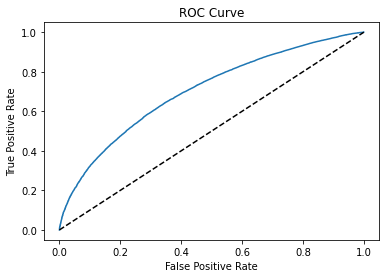

In [71]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [72]:
AUROC=roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])

In [73]:
AUROC

0.7022250959011025

Gini Coefficient- Cumulative % Defaulted vs Cumuluative % All
Kolmogorov Smirnov - Maximum Difference between the Cumulative Distribution Functions of 'Good' and 'Bad' borrowers

### Gini and Kolmogorov-Smirnov

In [74]:
df_actual_predicted_probs=df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [75]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.367151,0
42344,1,0.386137,0
39810,0,0.388392,0
40518,0,0.444055,0
42396,0,0.453050,0


In [76]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
262480,1,0.991263,1
231463,1,0.991304,1
239228,1,0.991662,1
261086,1,0.992076,1
242624,1,0.992668,1


In [77]:
df_actual_predicted_probs=df_actual_predicted_probs.reset_index()

In [78]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.367151,0
1,42344,1,0.386137,0
2,39810,0,0.388392,0
3,40518,0,0.444055,0
4,42396,0,0.453050,0


In [79]:
df_actual_predicted_probs['Cumulative N Population']=df_actual_predicted_probs.index+1

In [80]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population
0,42341,1,0.367151,0,1
1,42344,1,0.386137,0,2
2,39810,0,0.388392,0,3
3,40518,0,0.444055,0,4
4,42396,0,0.453050,0,5


In [81]:
df_actual_predicted_probs['Cumulative N Good']=df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [82]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good
0,42341,1,0.367151,0,1,1
1,42344,1,0.386137,0,2,2
2,39810,0,0.388392,0,3,2
3,40518,0,0.444055,0,4,2
4,42396,0,0.453050,0,5,2


In [83]:
df_actual_predicted_probs['Cumulative N Bad']=df_actual_predicted_probs['Cumulative N Population']-df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [84]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.367151,0,1,1,0
1,42344,1,0.386137,0,2,2,0
2,39810,0,0.388392,0,3,2,1
3,40518,0,0.444055,0,4,2,2
4,42396,0,0.453050,0,5,2,3


In [85]:
df_actual_predicted_probs['Cumulative Perc Population']=df_actual_predicted_probs['Cumulative N Population']/(df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good']=df_actual_predicted_probs['Cumulative N Good']/df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad']=df_actual_predicted_probs['Cumulative N Bad']/(df_actual_predicted_probs.shape[0]-df_actual_predicted_probs['loan_data_targets_test'].sum())

In [86]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.367151,0,1,1,0,0.000011,0.000012,0.000000
1,42344,1,0.386137,0,2,2,0,0.000021,0.000024,0.000000
2,39810,0,0.388392,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.444055,0,4,2,2,0.000043,0.000024,0.000196
4,42396,0,0.453050,0,5,2,3,0.000054,0.000024,0.000294


Text(0.5, 1.0, 'Gini')

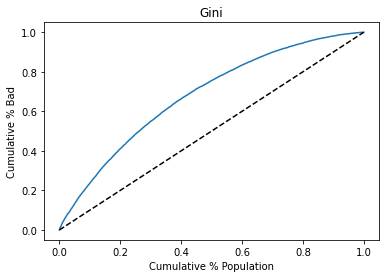

In [87]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Population'],linestyle='--',color='k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [88]:
Gini=AUROC*2-1
Gini

0.404450191802205

## Kolmogorov-Smirnov Test

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

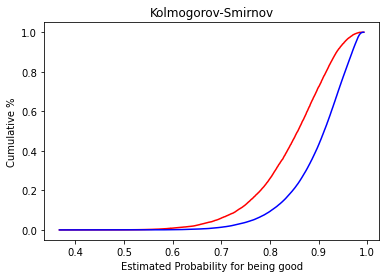

In [89]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for being good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [90]:
KS=max(df_actual_predicted_probs['Cumulative Perc Bad']-df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.2966527616964505

# Applying the PD Model

### Calculating the PD of individual Accounts

In [91]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [92]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.421554,NaN
1,grade:A,1.121231,2.031133e-49
2,grade:B,0.881607,5.345656e-57
3,grade:C,0.688271,3.738211e-40
4,grade:D,0.501086,3.800590e-24
5,grade:E,0.326943,1.401506e-13
6,grade:F,0.139324,2.477288e-03
7,home_ownership:OWN,0.093322,5.438914e-08
8,home_ownership:MORTGAGE,0.106049,7.101386e-23
9,addr_state:NM_VA,0.038059,1.665033e-01


In [93]:
y_hat_test_proba

array([0.92416457, 0.84845932, 0.88564809, ..., 0.97323182, 0.95976198,
       0.95237367])

### Creating a scorecard

In [94]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.421554,NaN
1,grade:A,1.121231,2.031133e-49
2,grade:B,0.881607,5.345656e-57
3,grade:C,0.688271,3.738211e-40
4,grade:D,0.501086,3.800590e-24
5,grade:E,0.326943,1.401506e-13
6,grade:F,0.139324,2.477288e-03
7,home_ownership:OWN,0.093322,5.438914e-08
8,home_ownership:MORTGAGE,0.106049,7.101386e-23
9,addr_state:NM_VA,0.038059,1.665033e-01


In [95]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [96]:
df_ref_categories=pd.DataFrame(ref_categories,columns=['Feature name'])

In [98]:
df_ref_categories['Coefficients']=0
df_ref_categories['p_values']=np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [99]:
df_scorecard=pd.concat([summary_table,df_ref_categories])

In [101]:
df_scorecard=df_scorecard.reset_index()

In [102]:
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.421554,NaN
1,1,grade:A,1.121231,2.031133e-49
2,2,grade:B,0.881607,5.345656e-57
3,3,grade:C,0.688271,3.738211e-40
4,4,grade:D,0.501086,3.800590e-24
5,5,grade:E,0.326943,1.401506e-13
6,6,grade:F,0.139324,2.477288e-03
7,7,home_ownership:OWN,0.093322,5.438914e-08
8,8,home_ownership:MORTGAGE,0.106049,7.101386e-23
9,9,addr_state:NM_VA,0.038059,1.665033e-01


In [106]:
df_scorecard['Original feature name']=df_scorecard['Feature name'].str.split(':').str[0]

In [107]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.421554,NaN,Intercept
1,1,grade:A,1.121231,2.031133e-49,grade
2,2,grade:B,0.881607,5.345656e-57,grade
3,3,grade:C,0.688271,3.738211e-40,grade
4,4,grade:D,0.501086,3.800590e-24,grade
5,5,grade:E,0.326943,1.401506e-13,grade
6,6,grade:F,0.139324,2.477288e-03,grade
7,7,home_ownership:OWN,0.093322,5.438914e-08,home_ownership
8,8,home_ownership:MORTGAGE,0.106049,7.101386e-23,home_ownership
9,9,addr_state:NM_VA,0.038059,1.665033e-01,addr_state


In [108]:
min_score=300
max_score=850

In [109]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.421554
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.075210
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.075103
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.010821
Name: Coefficients, dtype: float64

In [110]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -1.421554
acc_now_delinq                 0.195662
addr_state                     0.523835
annual_inc                     0.564659
dti                            0.385924
emp_length                     0.125521
grade                          1.121231
home_ownership                 0.106049
initial_list_status            0.054515
inq_last_6mths                 0.684134
int_rate                       0.891217
mths_since_earliest_cr_line    0.128682
mths_since_issue_d             1.077017
mths_since_last_delinq         0.190554
mths_since_last_record         0.515742
purpose                        0.302279
term                           0.078835
verification_status            0.086061
Name: Coefficients, dtype: float64

In [112]:
min_sum_coef=df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.5826873780187942

In [113]:
max_sum_coef=df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.610363068253518

In [114]:
df_scorecard['Score-Calculation']=df_scorecard['Coefficients']*(max_score-min_score)/(max_sum_coef-min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculation
0,0,Intercept,-1.421554,NaN,Intercept,-108.695836
1,1,grade:A,1.121231,2.031133e-49,grade,85.732374
2,2,grade:B,0.881607,5.345656e-57,grade,67.410074
3,3,grade:C,0.688271,3.738211e-40,grade,52.627085
4,4,grade:D,0.501086,3.800590e-24,grade,38.314399
5,5,grade:E,0.326943,1.401506e-13,grade,24.998937
6,6,grade:F,0.139324,2.477288e-03,grade,10.653062
7,7,home_ownership:OWN,0.093322,5.438914e-08,home_ownership,7.135680
8,8,home_ownership:MORTGAGE,0.106049,7.101386e-23,home_ownership,8.108757
9,9,addr_state:NM_VA,0.038059,1.665033e-01,addr_state,2.910093


In [117]:
df_scorecard['Score-Calculation'][0]=((df_scorecard['Coefficients'][0]-min_sum_coef)/(max_sum_coef-min_sum_coef))*(max_score-min_score)+min_score
df_scorecard

<ipython-input-117-e4f22ee3e42a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score-Calculation'][0]=((df_scorecard['Coefficients'][0]-min_sum_coef)/(max_sum_coef-min_sum_coef))*(max_score-min_score)+min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculation
0,0,Intercept,-1.421554,NaN,Intercept,312.320701
1,1,grade:A,1.121231,2.031133e-49,grade,85.732374
2,2,grade:B,0.881607,5.345656e-57,grade,67.410074
3,3,grade:C,0.688271,3.738211e-40,grade,52.627085
4,4,grade:D,0.501086,3.800590e-24,grade,38.314399
5,5,grade:E,0.326943,1.401506e-13,grade,24.998937
6,6,grade:F,0.139324,2.477288e-03,grade,10.653062
7,7,home_ownership:OWN,0.093322,5.438914e-08,home_ownership,7.135680
8,8,home_ownership:MORTGAGE,0.106049,7.101386e-23,home_ownership,8.108757
9,9,addr_state:NM_VA,0.038059,1.665033e-01,addr_state,2.910093


In [119]:
df_scorecard['Score-Preleminary']=df_scorecard['Score-Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculation,Score-Preleminary
0,0,Intercept,-1.421554,NaN,Intercept,312.320701,312.0
1,1,grade:A,1.121231,2.031133e-49,grade,85.732374,86.0
2,2,grade:B,0.881607,5.345656e-57,grade,67.410074,67.0
3,3,grade:C,0.688271,3.738211e-40,grade,52.627085,53.0
4,4,grade:D,0.501086,3.800590e-24,grade,38.314399,38.0
5,5,grade:E,0.326943,1.401506e-13,grade,24.998937,25.0
6,6,grade:F,0.139324,2.477288e-03,grade,10.653062,11.0
7,7,home_ownership:OWN,0.093322,5.438914e-08,home_ownership,7.135680,7.0
8,8,home_ownership:MORTGAGE,0.106049,7.101386e-23,home_ownership,8.108757,8.0
9,9,addr_state:NM_VA,0.038059,1.665033e-01,addr_state,2.910093,3.0


In [120]:
min_sum_score_prel=df_scorecard.groupby('Original feature name')['Score-Preleminary'].min().sum()
min_sum_score_prel

299.0

In [124]:
max_sum_score_prel=df_scorecard.groupby('Original feature name')['Score-Preleminary'].max().sum()
max_sum_score_prel

850.0

In [125]:
df_scorecard['Difference']=df_scorecard['Score-Preleminary']-df_scorecard['Score-Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculation,Score-Preleminary,Difference
0,0,Intercept,-1.421554,NaN,Intercept,312.320701,312.0,-0.320701
1,1,grade:A,1.121231,2.031133e-49,grade,85.732374,86.0,0.267626
2,2,grade:B,0.881607,5.345656e-57,grade,67.410074,67.0,-0.410074
3,3,grade:C,0.688271,3.738211e-40,grade,52.627085,53.0,0.372915
4,4,grade:D,0.501086,3.800590e-24,grade,38.314399,38.0,-0.314399
5,5,grade:E,0.326943,1.401506e-13,grade,24.998937,25.0,0.001063
6,6,grade:F,0.139324,2.477288e-03,grade,10.653062,11.0,0.346938
7,7,home_ownership:OWN,0.093322,5.438914e-08,home_ownership,7.135680,7.0,-0.135680
8,8,home_ownership:MORTGAGE,0.106049,7.101386e-23,home_ownership,8.108757,8.0,-0.108757
9,9,addr_state:NM_VA,0.038059,1.665033e-01,addr_state,2.910093,3.0,0.089907


## Calculating Credit Score

In [126]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [127]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculation,Score-Preleminary,Difference
0,0,Intercept,-1.421554,NaN,Intercept,312.320701,312.0,-0.320701
1,1,grade:A,1.121231,2.031133e-49,grade,85.732374,86.0,0.267626
2,2,grade:B,0.881607,5.345656e-57,grade,67.410074,67.0,-0.410074
3,3,grade:C,0.688271,3.738211e-40,grade,52.627085,53.0,0.372915
4,4,grade:D,0.501086,3.800590e-24,grade,38.314399,38.0,-0.314399
5,5,grade:E,0.326943,1.401506e-13,grade,24.998937,25.0,0.001063
6,6,grade:F,0.139324,2.477288e-03,grade,10.653062,11.0,0.346938
7,7,home_ownership:OWN,0.093322,5.438914e-08,home_ownership,7.135680,7.0,-0.135680
8,8,home_ownership:MORTGAGE,0.106049,7.101386e-23,home_ownership,8.108757,8.0,-0.108757
9,9,addr_state:NM_VA,0.038059,1.665033e-01,addr_state,2.910093,3.0,0.089907


In [128]:
inputs_test_with_ref_cat_w_intercept=inputs_test_with_ref_cat

In [129]:
inputs_test_with_ref_cat_w_intercept.insert(0,'Intercept',1)

In [130]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [131]:
inputs_test_with_ref_cat_w_intercept=inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [134]:
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculation,Score-Preleminary,Difference
0,0,Intercept,-1.421554,NaN,Intercept,312.320701,312.0,-0.320701
1,1,grade:A,1.121231,2.031133e-49,grade,85.732374,86.0,0.267626
2,2,grade:B,0.881607,5.345656e-57,grade,67.410074,67.0,-0.410074
3,3,grade:C,0.688271,3.738211e-40,grade,52.627085,53.0,0.372915
4,4,grade:D,0.501086,3.800590e-24,grade,38.314399,38.0,-0.314399


In [137]:
df_scorecard['Score - Final'] = df_scorecard['Score-Preleminary']

In [140]:
scorecard_scores=df_scorecard['Score - Final']

In [142]:
#scorecard_scores

In [157]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [158]:
scorecard_scores=scorecard_scores.values.reshape(102,1)

In [159]:
scorecard_scores.shape

(102, 1)

In [160]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [161]:
y_scores.head()

,0
362514,612.0
288564,552.0
213591,578.0
263083,631.0
165001,684.0


In [162]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.

In [163]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score.head()

,0
362514,0.923983
288564,0.847230
213591,0.886258
263083,0.939700
165001,0.968913


In [164]:
y_hat_test_proba[0: 5]

array([0.92416457, 0.84845932, 0.88564809, 0.94056105, 0.96870434])

In [166]:
df_actual_predicted_probs['y_hat_test_proba'].head()

93252    0.991263
93253    0.991304
93254    0.991662
93255    0.992076
93256    0.992668
Name: y_hat_test_proba, dtype: float64

## Setting Cut-Offs

In [167]:
# We need the confusion matrix again.
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [168]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7375,2815
1,35811,47256


In [169]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079083,0.030185
1,0.384003,0.506729


In [170]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5858112527745907

In [171]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99950932, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.9926684 , 0.9926684 , 0.99073962, ..., 0.48804092, 0.38839206,
        0.36715122]))

In [172]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

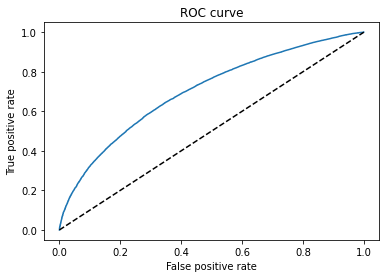

In [173]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [174]:
thresholds

array([1.9926684 , 0.9926684 , 0.99073962, ..., 0.48804092, 0.38839206,
       0.36715122])

In [175]:
thresholds.shape

(17328,)

In [176]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# We concatenate 3 dataframes along the columns.

In [177]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.

In [178]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.992668,0.000000,0.000000
1,0.992668,0.000000,0.000012
2,0.990740,0.000000,0.000120
3,0.990676,0.000098,0.000120
4,0.989777,0.000098,0.000445


In [179]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [180]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [181]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,2054.0
1,0.992668,0.000000,0.000012,796.0
2,0.990740,0.000000,0.000120,778.0
3,0.990676,0.000098,0.000120,778.0
4,0.989777,0.000098,0.000445,771.0


In [182]:
df_cutoffs['Score'][0] = max_score

In [183]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992668,0.000000,0.000012,796.0
2,0.990740,0.000000,0.000120,778.0
3,0.990676,0.000098,0.000120,778.0
4,0.989777,0.000098,0.000445,771.0


In [184]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17323,0.493488,0.999411,0.999952,419.0
17324,0.492059,0.999509,0.999952,419.0
17325,0.488041,0.999509,0.999976,417.0
17326,0.388392,1.000000,0.999976,386.0
17327,0.367151,1.000000,1.000000,379.0


In [185]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [186]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [187]:
df_actual_predicted_probs['y_hat_test_proba'].shape

(93257,)

In [188]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992668,0.000000,0.000012,796.0,1,93256,0.000011,0.999989
2,0.990740,0.000000,0.000120,778.0,10,93247,0.000107,0.999893
3,0.990676,0.000098,0.000120,778.0,11,93246,0.000118,0.999882
4,0.989777,0.000098,0.000445,771.0,38,93219,0.000407,0.999593


In [189]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17323,0.493488,0.999411,0.999952,419.0,93247,10,0.999893,0.000107
17324,0.492059,0.999509,0.999952,419.0,93248,9,0.999903,0.000097
17325,0.488041,0.999509,0.999976,417.0,93250,7,0.999925,0.000075
17326,0.388392,1.000000,0.999976,386.0,93255,2,0.999979,0.000021
17327,0.367151,1.000000,1.000000,379.0,93257,0,1.000000,0.000000


In [190]:
df_cutoffs.iloc[5000: 6200, ]
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.904007,0.257115,0.545162,592.0,47905,45352,0.513688,0.486312
5001,0.903999,0.257115,0.545186,592.0,47907,45350,0.513709,0.486291
5002,0.903996,0.257213,0.545186,592.0,47908,45349,0.513720,0.486280
5003,0.903996,0.257213,0.545198,592.0,47909,45348,0.513731,0.486269
5004,0.903994,0.257311,0.545198,592.0,47910,45347,0.513742,0.486258
5005,0.903991,0.257311,0.545223,592.0,47912,45345,0.513763,0.486237
5006,0.903987,0.257409,0.545235,592.0,47914,45343,0.513784,0.486216
5007,0.903980,0.257409,0.545271,592.0,47917,45340,0.513817,0.486183
5008,0.903980,0.257507,0.545271,592.0,47918,45339,0.513827,0.486173
5009,0.903975,0.257507,0.545331,592.0,47923,45334,0.513881,0.486119


In [191]:
df_cutoffs.iloc[1000: 2000, ]
# Here we display the dataframe with cutoffs form line with index 1000 to line with index 2000.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.953278,0.049166,0.206291,652.0,17637,75620,0.189123,0.810877
1001,0.953267,0.049166,0.206412,652.0,17647,75610,0.189230,0.810770
1002,0.953265,0.049264,0.206412,652.0,17648,75609,0.189240,0.810760
1003,0.953208,0.049264,0.206905,651.0,17689,75568,0.189680,0.810320
1004,0.953204,0.049362,0.206905,651.0,17690,75567,0.189691,0.810309
1005,0.953195,0.049362,0.207002,651.0,17698,75559,0.189777,0.810223
1006,0.953191,0.049460,0.207002,651.0,17699,75558,0.189787,0.810213
1007,0.953172,0.049460,0.207134,651.0,17710,75547,0.189905,0.810095
1008,0.953172,0.049558,0.207134,651.0,17711,75546,0.189916,0.810084
1009,0.953156,0.049558,0.207266,651.0,17722,75535,0.190034,0.809966


In [196]:
df_cutoffs.iloc[4500: 5001, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
4500,0.908887,0.230618,0.514765,597.0,45110,48147,0.483717,0.516283
4501,0.908886,0.230618,0.514777,597.0,45111,48146,0.483728,0.516272
4502,0.908878,0.230815,0.514777,597.0,45113,48144,0.483749,0.516251
4503,0.908865,0.230815,0.514861,597.0,45120,48137,0.483824,0.516176
4504,0.908864,0.230913,0.514861,597.0,45121,48136,0.483835,0.516165
4505,0.908818,0.230913,0.515259,597.0,45154,48103,0.484189,0.515811
4506,0.908818,0.231011,0.515259,597.0,45155,48102,0.484200,0.515800
4507,0.908811,0.231011,0.515307,597.0,45159,48098,0.484242,0.515758
4508,0.908808,0.231109,0.515307,597.0,45160,48097,0.484253,0.515747
4509,0.908799,0.231109,0.515403,597.0,45168,48089,0.484339,0.515661


In [192]:
os.chdir(r'E:\DataScience-Assignments\Credit Risk Modelling Using Python')

In [193]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [194]:
df_scorecard.to_csv('df_scorecard.csv')